Descriptive Statistics:
Mean: 22.32307051953956
Median (Q2): 21.844081359112543
Standard Deviation: 9.309390049067858
Variance: 86.66474308568364
Min: 5.7606804339805535
Max: 39.96003191971152
Q1 (25th percentile): 15.251313573203554
Q3 (75th percentile): 29.706746709642054
Interquartile Range (IQR): 14.4554331364385


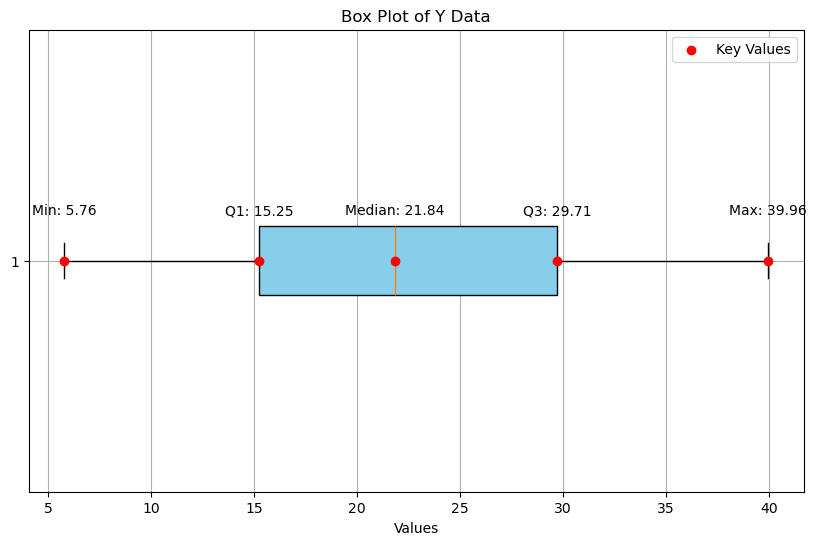

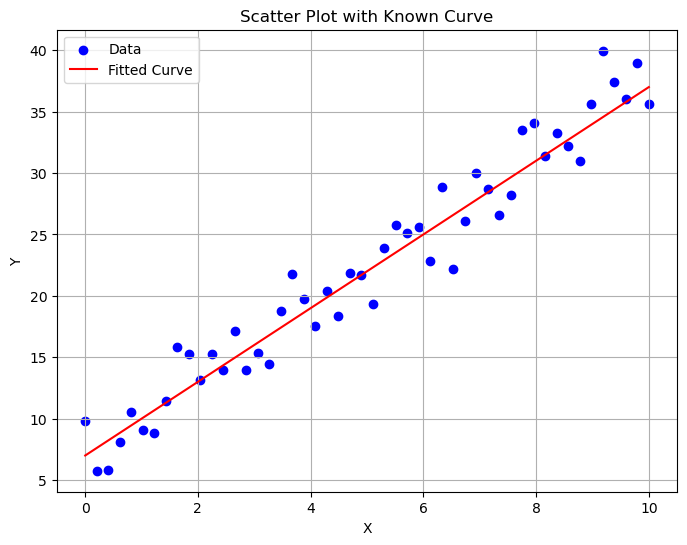

Linear Regression: y = 3.08x + 6.92, R^2 = 0.9497
Curve Fit Parameters: [3.08048913 6.9206249 ]


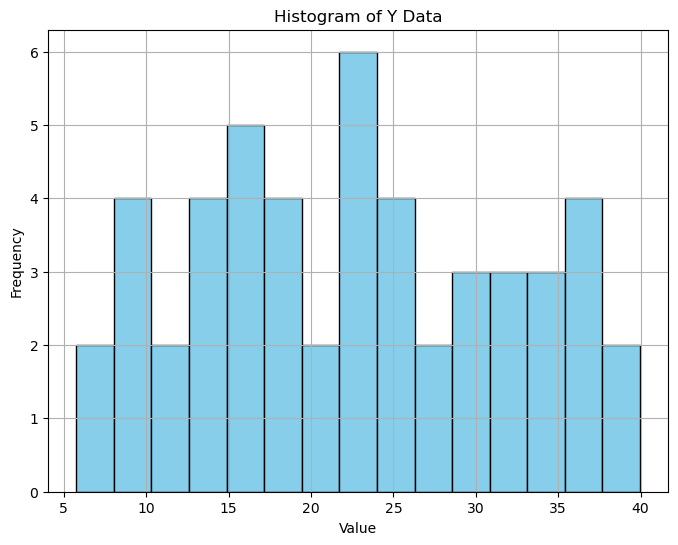

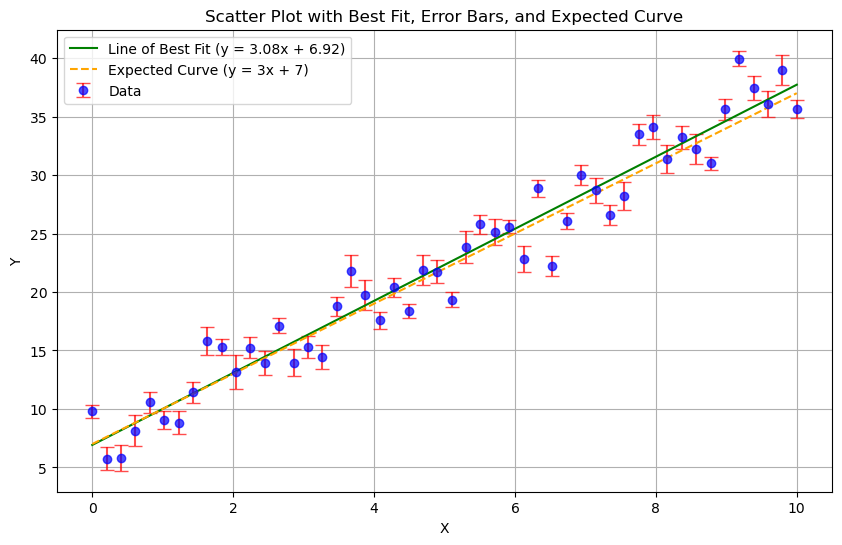

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import linregress


# Segment 1 - Importing Data from Excel or Other File
def import_data(file_path, columns=None):
    """
    Import data from an Excel or CSV file and return as NumPy arrays.

    :param file_path: Path to the file
    :param columns: List of column names to extract (if None, all columns are extracted)
    :return: NumPy arrays for the selected columns
    """
    data = pd.read_excel(file_path) if file_path.endswith('.xlsx') else pd.read_csv(file_path)
    if columns:
        data = data[columns]
    return data.to_numpy()


# Segment 2 - Descriptive Statistics
def descriptive_statistics(data):
    """
    Compute descriptive statistics for the given data.

    :param data: NumPy array of data
    :return: Dictionary of descriptive statistics
    """
    return {
        "Mean": np.mean(data),
        "Median (Q2)": np.median(data),
        "Standard Deviation": np.std(data),
        "Variance": np.var(data),
        "Min": np.min(data),
        "Max": np.max(data),
        "Q1 (25th percentile)": np.percentile(data, 25),
        "Q3 (75th percentile)": np.percentile(data, 75),
        "Interquartile Range (IQR)": np.percentile(data, 75) - np.percentile(data, 25),
    }

def box_plot(data, title="Box Plot"):
    """
    Create a box-and-whisker plot for the given data, mark key statistics, and list values.

    :param data: Data to plot
    :param title: Title for the plot
    """
    stats = descriptive_statistics(data)
    Q1 = stats["Q1 (25th percentile)"]
    Q2 = stats["Median (Q2)"]
    Q3 = stats["Q3 (75th percentile)"]
    min_val = stats["Min"]
    max_val = stats["Max"]

    plt.figure(figsize=(10, 6))
    box = plt.boxplot(data, vert=False, patch_artist=True, 
                      boxprops=dict(facecolor="skyblue", color="black"))
    plt.scatter([min_val, Q1, Q2, Q3, max_val], [1, 1, 1, 1, 1], color='red', zorder=3, label="Key Values")

    # Annotate key values
    plt.annotate(f"Min: {min_val:.2f}", (min_val, 1.1), fontsize=10, ha='center')
    plt.annotate(f"Q1: {Q1:.2f}", (Q1, 1.1), fontsize=10, ha='center')
    plt.annotate(f"Median: {Q2:.2f}", (Q2, 1.1), fontsize=10, ha='center')
    plt.annotate(f"Q3: {Q3:.2f}", (Q3, 1.1), fontsize=10, ha='center')
    plt.annotate(f"Max: {max_val:.2f}", (max_val, 1.1), fontsize=10, ha='center')

    plt.title(title)
    plt.xlabel("Values")
    plt.grid()
    plt.legend()
    plt.show()



# Segment 3 - Scatter Plot + Known Curve
def scatter_plot_with_curve(x, y, curve_func=None, label="Data", curve_label="Fitted Curve"):
    """
    Create a scatter plot with an optional overlay of a known curve.

    :param x: X-axis data
    :param y: Y-axis data
    :param curve_func: Function to plot as the known curve
    :param label: Label for the data points
    :param curve_label: Label for the fitted curve
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(x, y, label=label, color='blue')
    if curve_func:
        x_fit = np.linspace(np.min(x), np.max(x), 500)
        y_fit = curve_func(x_fit)
        plt.plot(x_fit, y_fit, label=curve_label, color='red')
    plt.title("Scatter Plot with Known Curve")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid()
    plt.show()


# Segment 4 - Regression Analysis + Curve Fitting
def regression_analysis(x, y):
    """
    Perform linear regression on the given data.

    :param x: X-axis data
    :param y: Y-axis data
    :return: Slope, intercept, and R-squared value
    """
    slope, intercept, r_value, _, _ = linregress(x, y)
    print(f"Linear Regression: y = {slope:.2f}x + {intercept:.2f}, R^2 = {r_value**2:.4f}")
    return slope, intercept


def curve_fitting(x, y, fit_func):
    """
    Perform curve fitting on the given data.

    :param x: X-axis data
    :param y: Y-axis data
    :param fit_func: Function to fit to the data
    :return: Optimal parameters for the curve
    """
    popt, _ = curve_fit(fit_func, x, y)
    print(f"Curve Fit Parameters: {popt}")
    return popt


# Segment 5 - Histogram Plots
def plot_histogram(data, bins=10, title="Histogram"):
    """
    Create a histogram for the given data.

    :param data: Data to plot
    :param bins: Number of bins
    :param title: Title for the plot
    """
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=bins, color='skyblue', edgecolor='black')
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.grid()
    plt.show()

# Segment 6 - Error Analysis (Error Bars on Data Points)
def scatter_plot_with_error_bars(x, y, yerr, expected_curve_func=None, label="Data", curve_label="Expected Curve"):
    """
    Create a scatter plot with a line of best fit, error bars, and an optional overlay of an expected curve.

    :param x: X-axis data
    :param y: Y-axis data
    :param yerr: Error values for the Y-axis data
    :param expected_curve_func: Function to plot as the expected curve
    :param label: Label for the data points
    :param curve_label: Label for the expected curve
    """
    # Fit a line of best fit
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    best_fit_line = slope * x + intercept

    plt.figure(figsize=(10, 6))
    plt.errorbar(x, y, yerr=yerr, fmt='o', label=label, color='blue', ecolor='red', capsize=5, alpha=0.7)

    # Line of best fit
    plt.plot(x, best_fit_line, label=f"Line of Best Fit (y = {slope:.2f}x + {intercept:.2f})", color='green')

    # Expected curve
    if expected_curve_func:
        x_fit = np.linspace(np.min(x), np.max(x), 500)
        y_fit = expected_curve_func(x_fit)
        plt.plot(x_fit, y_fit, label=curve_label, color='orange', linestyle='--')

    plt.title("Scatter Plot with Best Fit, Error Bars, and Expected Curve")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.grid()
    plt.show()


if __name__ == "__main__":
    # Import data
    # file_path = "example_data.xlsx"
    # data = import_data(file_path, columns=["x", "y"])
    # x, y = data[:, 0], data[:, 1]


    # Generate synthetic data
    x = np.linspace(0, 10, 50)
    y = 3 * x + 7 + np.random.normal(0, 2, len(x))  # Linear data with noise
    
    # Segment 2 - Descriptive Statistics
    print("Descriptive Statistics:")
    stats = descriptive_statistics(y)
    for key, value in stats.items():
        print(f"{key}: {value}")

    box_plot(y, title="Box Plot of Y Data")
    
    # Segment 3 - Scatter Plot + Known Curve
    scatter_plot_with_curve(x, y, curve_func=lambda x: 3 * x + 7)
    
    # Segment 4 - Regression Analysis + Curve Fitting
    slope, intercept = regression_analysis(x, y)
    popt = curve_fitting(x, y, fit_func=lambda x, m, c: m * x + c)
    
    # Segment 5 - Histogram Plots
    plot_histogram(y, bins=15, title="Histogram of Y Data")
    
    # Segment 6 - Error Analysis
    yerr = np.random.uniform(0.5, 1.5, len(y))  # Example error values
    scatter_plot_with_error_bars(
        x, y, yerr,
        expected_curve_func=lambda x: 3 * x + 7,
        label="Data",
        curve_label="Expected Curve (y = 3x + 7)"
    )
    
    